# Task 1: Student Pass/Fail Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Load dataset

In [3]:
data = pd.read_csv("D:/student_data.csv")

##  Data Exploration 

In [4]:
print("Dataset Info:\n", data.info())
print("\n Dataset Summary:\n", data.describe())
print("\n Missing Values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   StudyHours  15 non-null     int64
 1   Attendance  15 non-null     int64
 2   Pass        15 non-null     int64
dtypes: int64(3)
memory usage: 492.0 bytes
Dataset Info:
 None

 Dataset Summary:
        StudyHours  Attendance       Pass
count   15.000000   15.000000  15.000000
mean    10.466667   68.333333   0.600000
std      5.330059   20.073674   0.507093
min      2.000000   35.000000   0.000000
25%      6.500000   52.500000   0.000000
50%     10.000000   70.000000   1.000000
75%     14.500000   86.500000   1.000000
max     20.000000   95.000000   1.000000

 Missing Values:
 StudyHours    0
Attendance    0
Pass          0
dtype: int64


## Visualization

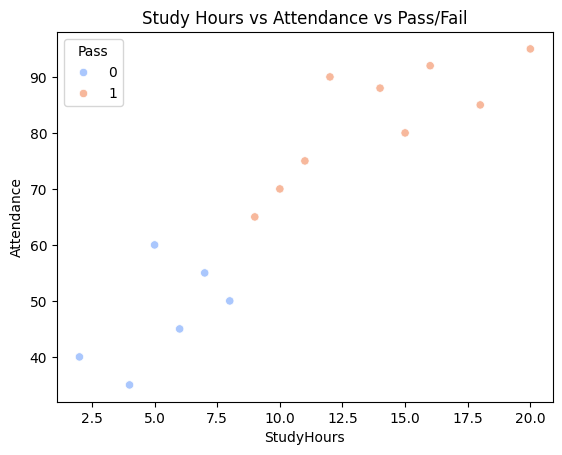

In [5]:
sns.scatterplot(x="StudyHours", y="Attendance", hue="Pass", data=data, palette="coolwarm")
plt.title("Study Hours vs Attendance vs Pass/Fail")
plt.show()


##  Model Training 

In [6]:
X = data[["StudyHours", "Attendance"]]
y = data["Pass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Predictions

In [7]:
y_pred = model.predict(X_test)

## Evaluation 


Model Accuracy: 1.0


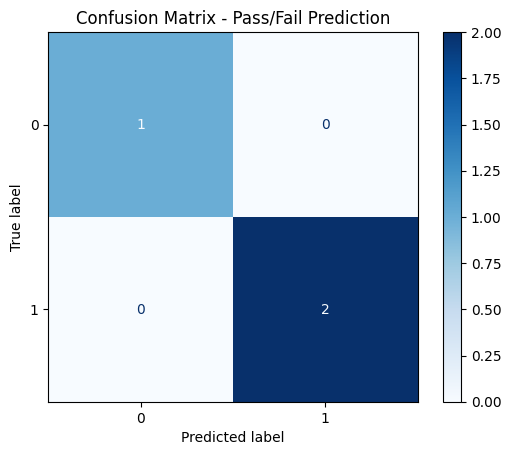

In [9]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("\nModel Accuracy:", acc)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix - Pass/Fail Prediction")
plt.show()

# Task 2: Sentiment Analysis with NLP

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Load dataset

In [11]:
data = pd.read_csv("D:/reviews.csv")

## Preprocessing 

In [12]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(data["Review"])
y = data["Sentiment"].map({"positive": 1, "negative": 0})

## Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Model Training 

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Predictions

In [25]:
y_pred = model.predict(X_test)

## Evaluation

In [26]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=1))
print("Recall:", recall_score(y_test, y_pred, zero_division=1))
print("F1 Score:", f1_score(y_test, y_pred, zero_division=1))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



## Example predictions

In [27]:
test_results = pd.DataFrame({
    "Review": data["Review"].iloc[y_test.index],
    "Actual": y_test.map({1:"positive", 0:"negative"}),
    "Predicted": pd.Series(y_pred, index=y_test.index).map({1:"positive", 0:"negative"})
})
print("\nSample Predictions:\n", test_results.head())


Sample Predictions:
                                        Review    Actual Predicted
8  Very happy with this product, works great.  positive  positive
1     Worst purchase ever, very disappointed.  negative  positive
